In [1]:
import os
import xarray as xr

from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

from cgsn_processing.process.proc_optaa import proc_optaa

In [2]:
# setup base data directory
home = os.path.expanduser('~')
test_base = os.path.abspath(os.path.join(home, 'ooidata/testing/ce04ossm/optaa'))

# setup inputs needed by the function
infile = os.path.join(test_base, '20200801_003021.optaa.json')
coeff_file = os.path.join(test_base, 'optaa.cal_coeffs.json')
platform = 'CE04OSSM'  # platform name, upper case
deployment = 'D00010'  # deployment name, upper case
lat = 44.37868         # deployment latitude, from anchor survey
lon = -124.94508       # deployment longitude, from anchor survey
depth = 7.0            # NSIF depth
ctd_name = 'ctdbp'     # directory name of co-located CTD

In [3]:
# process the data file -- burst averaging set to false
optaa = proc_optaa(infile, coeff_file, platform, deployment, lat, lon, depth, burst=False, ctd_name=ctd_name)
optaa

<xarray.Dataset>
Dimensions:                (station: 1, time: 679, wavelength_number: 100)
Coordinates:
  * time                   (time) float64 1.596e+09 1.596e+09 ... 1.596e+09
  * wavelength_number      (wavelength_number) int32 0 1 2 3 4 ... 96 97 98 99
  * station                (station) <U8 'CE04OSSM'
Data variables:
    z                      (station, time) float64 7.0 7.0 7.0 ... 7.0 7.0 7.0
    serial_number          (station, time) int32 208 208 208 208 ... 208 208 208
    elapsed_run_time       (station, time) float64 6.018e+04 ... 2.302e+05
    internal_temp_raw      (station, time) int32 49491 49489 ... 49497 49498
    external_temp_raw      (station, time) int32 37549 37550 ... 37606 37600
    pressure_raw           (station, time) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    a_signal_dark          (station, time) int32 700 700 700 700 ... 700 700 700
    a_reference_dark       (station, time) int32 472 472 471 472 ... 470 470 470
    c_signal_dark          (station, time) int32 710 710 711 711 ... 709 709 709
    c_reference_dark       (station, time) int32 476 476 477 477 ... 474 475 474
    internal_temp          (station, time) float64 13.06 13.06 ... 13.04 13.04
    external_temp          (station, time) float64 12.9 12.89 ... 12.81 12.82
    pressure               (station, time) float64 nan nan nan ... nan nan nan
    estimated_chlorophyll  (station, time) float64 1.566 1.684 ... 1.567 1.571
    estimated_poc          (station, time) float64 303.3 315.3 ... 288.8 289.5
    ratio_cdom             (station, time) float64 1.293 1.219 ... 1.261 1.225
    ratio_carotenoids      (station, time) float64 0.6011 0.5823 ... 0.5837
    ratio_phycobilins      (station, time) float64 0.3663 0.3522 ... 0.3621
    ratio_soret            (station, time) float64 0.1979 0.2042 ... 0.1918
    a_wavelengths          (station, time, wavelength_number) float64 401.2 ....
    a_signal_raw           (station, time, wavelength_number) int32 398 ... -...
    a_reference_raw        (station, time, wavelength_number) int32 745 ... -...
    c_wavelengths          (station, time, wavelength_number) float64 400.0 ....
    c_signal_raw           (station, time, wavelength_number) int32 648 ... -...
    c_reference_raw        (station, time, wavelength_number) int32 700 ... -...
    apd                    (station, time, wavelength_number) float64 0.43 .....
    apd_ts                 (station, time, wavelength_number) float64 0.4296 ...
    apd_ts_s               (station, time, wavelength_number) float64 0.3834 ...
    cpd                    (station, time, wavelength_number) float64 1.193 ....
    cpd_ts                 (station, time, wavelength_number) float64 1.194 ....
    deploy_id              (station, time) <U6 'D00010' 'D00010' ... 'D00010'
    lat                    (station) float64 44.38
    lon                    (station) float64 -124.9
Attributes:
    title:                         Optical Absorbance and Attenuation from OPTAA
    summary:                       Measures the absorabance and attenuation o...
    project:                       Ocean Observatories Initiative
    institution:                   Coastal and Global Scale Nodes, (CGSN)
    acknowledgement:               National Science Foundation
    references:                    http://oceanobservatories.org
    creator_name:                  Ocean Observatories Initiative
    creator_email:                 helpdesk@oceanobservatories.org
    creator_url:                   http://oceanobservatories.org
    featureType:                   timeSeries
    cdm_data_type:                 Station
    Conventions:                   CF-1.6
    comment:                       Mooring ID: CE04OSSM-00010
    date_created:                  2020-09-21T22:21:00Z
    geospatial_lat_max:            44.37868
    geospatial_lat_min:            44.37868
    geospatial_lon_max:            -124.94508
    geospatial_lon_min:            -124.94508
    geospatial_vertical_max:       7

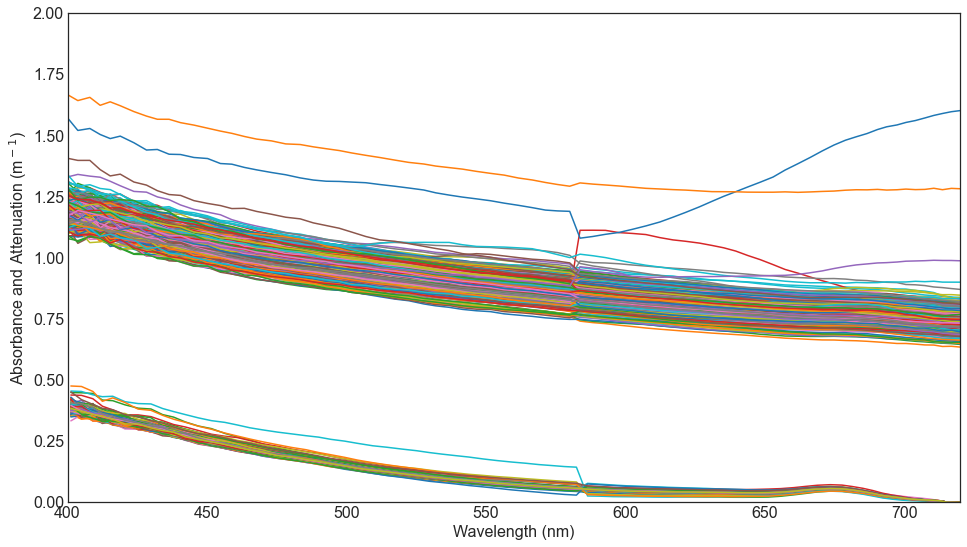

In [4]:
# plot the absorbance and attenuation spectra
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})
plt.plot(optaa.a_wavelengths[0, :, :].T, optaa.apd_ts_s[0, :, :].T, label='apd')
plt.plot(optaa.c_wavelengths[0, :, :].T, optaa.cpd_ts[0, :, :].T, label='cpd')
plt.ylabel('Absorbance and Attenuation (m$^-$$^1$)')
plt.xlabel('Wavelength (nm)')
plt.xlim(400, 720)
plt.ylim(0, 2)
plt.show()

In [5]:
# process the data file -- burst averaging set to true
burst = proc_optaa(infile, coeff_file, platform, deployment, lat, lon, depth, burst=True, ctd_name=ctd_name)
burst

<xarray.Dataset>
Dimensions:                (station: 1, time: 1, wavelength_number: 100)
Coordinates:
  * time                   (time) float64 1.596e+09
  * wavelength_number      (wavelength_number) int32 0 1 2 3 4 ... 96 97 98 99
  * station                (station) <U8 'CE04OSSM'
Data variables:
    z                      (station, time) float64 7.0
    serial_number          (station, time) float64 208.0
    elapsed_run_time       (station, time) float64 1.452e+05
    internal_temp_raw      (station, time) float64 4.949e+04
    external_temp_raw      (station, time) float64 3.756e+04
    pressure_raw           (station, time) float64 0.0
    a_signal_dark          (station, time) float64 699.0
    a_reference_dark       (station, time) float64 471.0
    c_signal_dark          (station, time) float64 710.0
    c_reference_dark       (station, time) float64 475.0
    internal_temp          (station, time) float64 13.06
    external_temp          (station, time) float64 12.87
    pressure               (station, time) float64 nan
    estimated_chlorophyll  (station, time) float64 1.607
    estimated_poc          (station, time) float64 300.0
    ratio_cdom             (station, time) float64 1.252
    ratio_carotenoids      (station, time) float64 0.5946
    ratio_phycobilins      (station, time) float64 0.3636
    ratio_soret            (station, time) float64 0.1959
    a_wavelengths          (station, time, wavelength_number) float64 401.2 ....
    a_signal_raw           (station, time, wavelength_number) float64 nan ......
    a_reference_raw        (station, time, wavelength_number) float64 nan ......
    c_wavelengths          (station, time, wavelength_number) float64 400.0 ....
    c_signal_raw           (station, time, wavelength_number) float64 nan ......
    c_reference_raw        (station, time, wavelength_number) float64 nan ......
    apd                    (station, time, wavelength_number) float64 0.4367 ...
    apd_ts                 (station, time, wavelength_number) float64 0.4363 ...
    apd_ts_s               (station, time, wavelength_number) float64 0.3877 ...
    cpd                    (station, time, wavelength_number) float64 1.199 ....
    cpd_ts                 (station, time, wavelength_number) float64 1.2 ......
    deploy_id              (station, time) <U6 'D00010'
    lat                    (station) float64 44.38
    lon                    (station) float64 -124.9
Attributes:
    title:                         Optical Absorbance and Attenuation from OPTAA
    summary:                       Measures the absorabance and attenuation o...
    project:                       Ocean Observatories Initiative
    institution:                   Coastal and Global Scale Nodes, (CGSN)
    acknowledgement:               National Science Foundation
    references:                    http://oceanobservatories.org
    creator_name:                  Ocean Observatories Initiative
    creator_email:                 helpdesk@oceanobservatories.org
    creator_url:                   http://oceanobservatories.org
    featureType:                   timeSeries
    cdm_data_type:                 Station
    Conventions:                   CF-1.6
    comment:                       Mooring ID: CE04OSSM-00010
    date_created:                  2020-09-21T22:21:00Z
    geospatial_lat_max:            44.37868
    geospatial_lat_min:            44.37868
    geospatial_lon_max:            -124.94508
    geospatial_lon_min:            -124.94508
    geospatial_vertical_max:       7.0
    geospatial_vertical_min:       7.0
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m

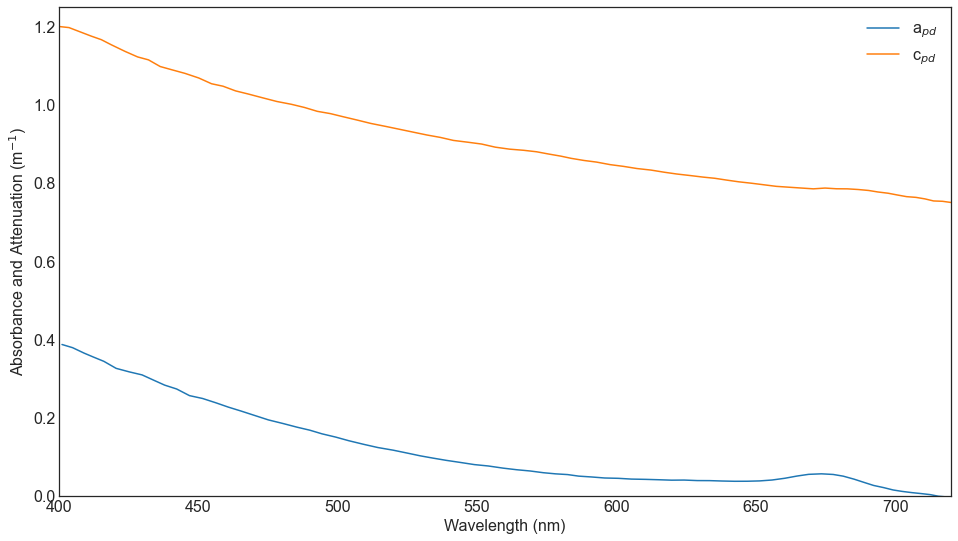

In [6]:
# plot the absorbance and attenuation spectra
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})
plt.plot(burst.a_wavelengths[0, :, :].T, burst.apd_ts_s[0, :, :].T, label='a$_{pd}$')
plt.plot(burst.c_wavelengths[0, :, :].T, burst.cpd_ts[0, :, :].T, label='c$_{pd}$')
plt.ylabel('Absorbance and Attenuation (m$^{-1}$)')
plt.xlabel('Wavelength (nm)')
plt.xlim(400, 720)
plt.ylim(0, 1.25)
plt.legend()
plt.show()

In [7]:
# load and process all the data from July 12 through August 19
files = [x for x in os.listdir(test_base) if x.endswith("optaa.json")]
data = []
for file in files:
    infile = os.path.join(test_base, file)
    d = proc_optaa(infile, coeff_file, platform, deployment, lat, lon, depth, burst=True, ctd_name=ctd_name)
    data.append(d)

In [8]:
# compile a month long record for CE04OSSM
month = xr.concat(data, dim='time')
month = month.sortby('time')
month = xr.decode_cf(month)

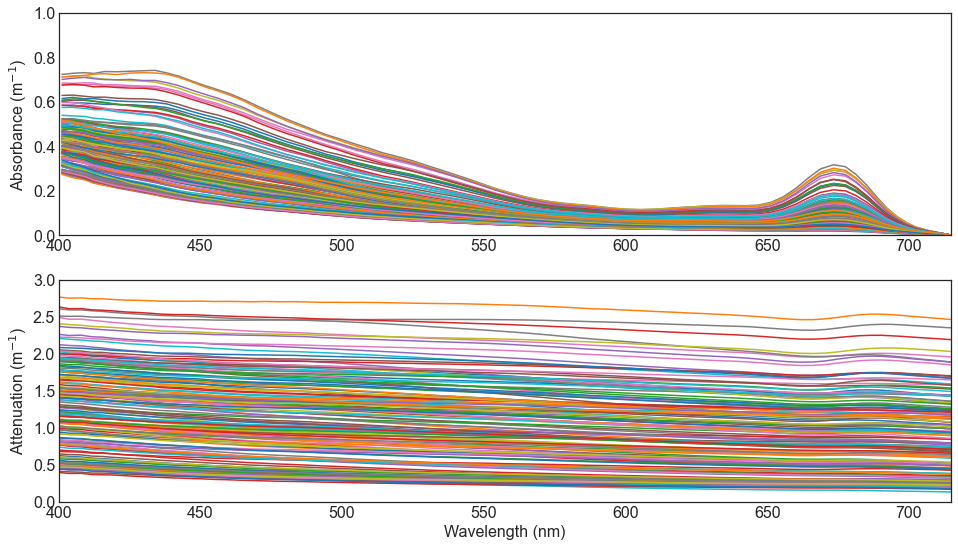

In [9]:
# plot the absorbance and attenuation spectra
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 16})
plt.subplot(2,1,1)
plt.plot(month.a_wavelengths[0, :, :].T, month.apd_ts_s[0, :, :].T, label='a$_{pd}$')
plt.ylabel('Absorbance (m$^{-1}$)')
plt.ylim(0, 1)
plt.xlim(400, 715)
plt.subplot(2,1,2)
plt.plot(month.c_wavelengths[0, :, :].T, month.cpd_ts[0, :, :].T, label='c$_{pd}$')
plt.ylabel('Attenuation (m$^{-1}$)')
plt.xlabel('Wavelength (nm)')
plt.ylim(0, 3)
plt.xlim(400, 715)
plt.show()

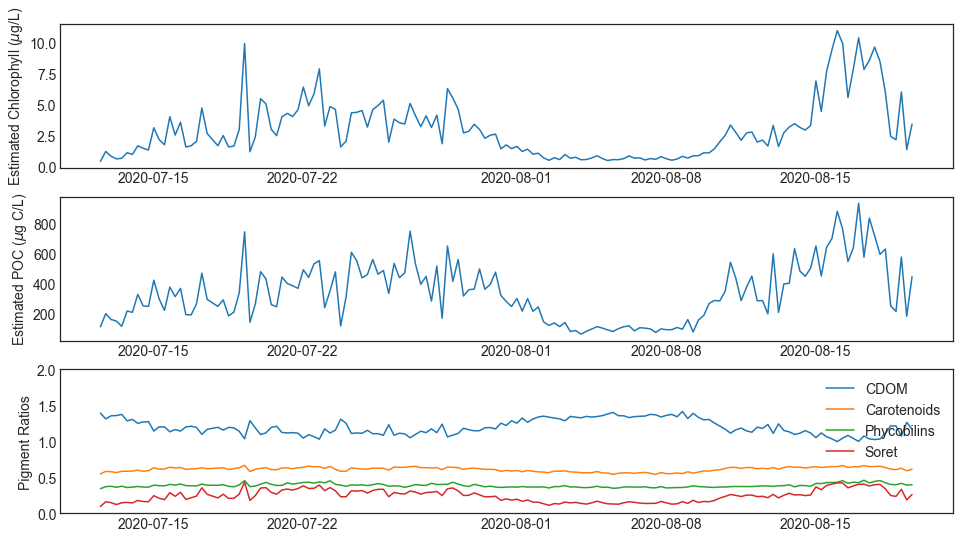

In [10]:
# plot the absorbance and attenuation spectra
plt.figure(figsize=(16,9))
plt.rcParams.update({'font.size': 14})
plt.subplot(3,1,1)
plt.plot(month.time, month.estimated_chlorophyll[0, :], label='chl')
plt.ylabel('Estimated Chlorophyll ($\mu$g/L)')
plt.subplot(3,1,2)
plt.plot(month.time, month.estimated_poc[0, :], label='poc')
plt.ylabel('Estimated POC ($\mu$g C/L)')
plt.subplot(3,1,3)
plt.plot(month.time, month.ratio_cdom[0, :], label='CDOM')
plt.plot(month.time, month.ratio_carotenoids[0, :], label='Carotenoids')
plt.plot(month.time, month.ratio_phycobilins[0, :], label='Phycobilins')
plt.plot(month.time, month.ratio_soret[0, :], label='Soret')
plt.ylim(0, 2)
plt.ylabel('Pigment Ratios')
plt.legend(facecolor="white")
plt.show()